In [10]:

import numpy as np
import torch
import matplotlib.pyplot as plt
from cebmf_torch import *
def rmse(A,B):
    return np.sqrt(((A-B)**2).mean())



In [2]:

rng = np.random.default_rng(0)
n,p=50,40
u = rng.random(n); v=rng.random(p)
X = np.outer(u,v) + rng.normal(0,0.1,(n,p))

Y = torch.tensor(X, dtype=torch.float32)
m = cEBMF(Y, K=5, prior_L="norm", prior_F="norm")
m.initialize("svd")
base = rmse((m.L@m.F.T).cpu().numpy(), np.outer(u,v))



In [8]:
for _ in range(20):
        m.iter_once()
improved = rmse((m.L@m.F.T).cpu().numpy(), np.outer(u,v))

In [4]:
improved <= base + 1e-8

True

In [7]:
base 

0.05827887506554921

In [9]:
improved

0.02926664517802847

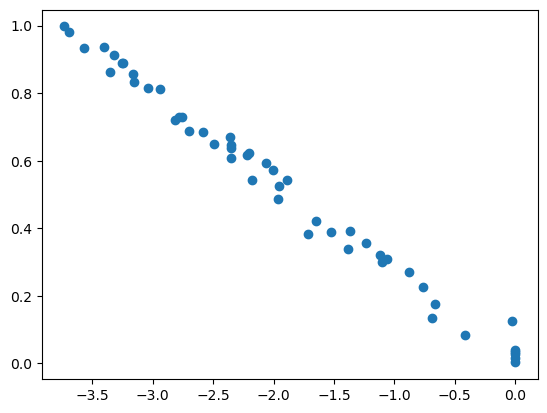

In [14]:
plt.scatter( m.L[:,0],u   )

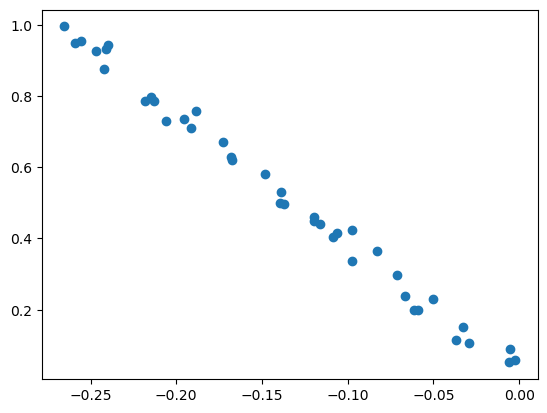

In [16]:
plt.scatter( m.F[:,0],v   )